In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore
from scipy.stats import boxcox

In [54]:
df=pd.read_csv("E:\\avocado.csv")
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


data set is loaded

___Given Information

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU( Product Lookup codes ) 4046 sold

4225 - Total number of avocados with PLU( Product Lookup codes ) 4225 sold

4770 - Total number of avocados with PLU( Product Lookup codes ) 4770 sold

In [28]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

date,region,type are object datatype. year is integer datatype but it is categorical data.Remaining all are float data type

In [29]:
df.shape

(18249, 14)

this data set has 18249 rows and 14 columns

In [30]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [31]:
col=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in col:
    print(df.loc[df[i]==""])

Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, regi

This dataset has no empty space

Removing unwanted coloumn

In [56]:
df_new=df.drop('Unnamed: 0',axis=1)

unnamed 0 feature having index value which is already available in dataframe so I'm removing it

In [33]:
df_new.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Changing coloumns name for easy access 

In [57]:
df_new.columns = ['Date','AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags','type','year','region']

In [58]:
df_new.head(5)

,Date,AveragePrice,Total_Volume,A4046,A4225,A4770,Total_Bags,S_Bags,L_Bags,XL_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

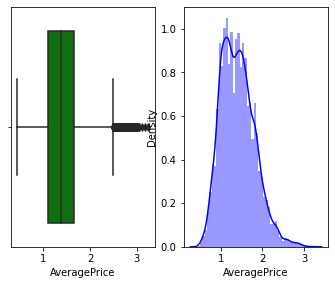

In [11]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df['AveragePrice'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['AveragePrice'],color='blue')

average price feature has outliers.The data distribution of this feature is normal

<AxesSubplot:xlabel='Total_Volume', ylabel='Density'>

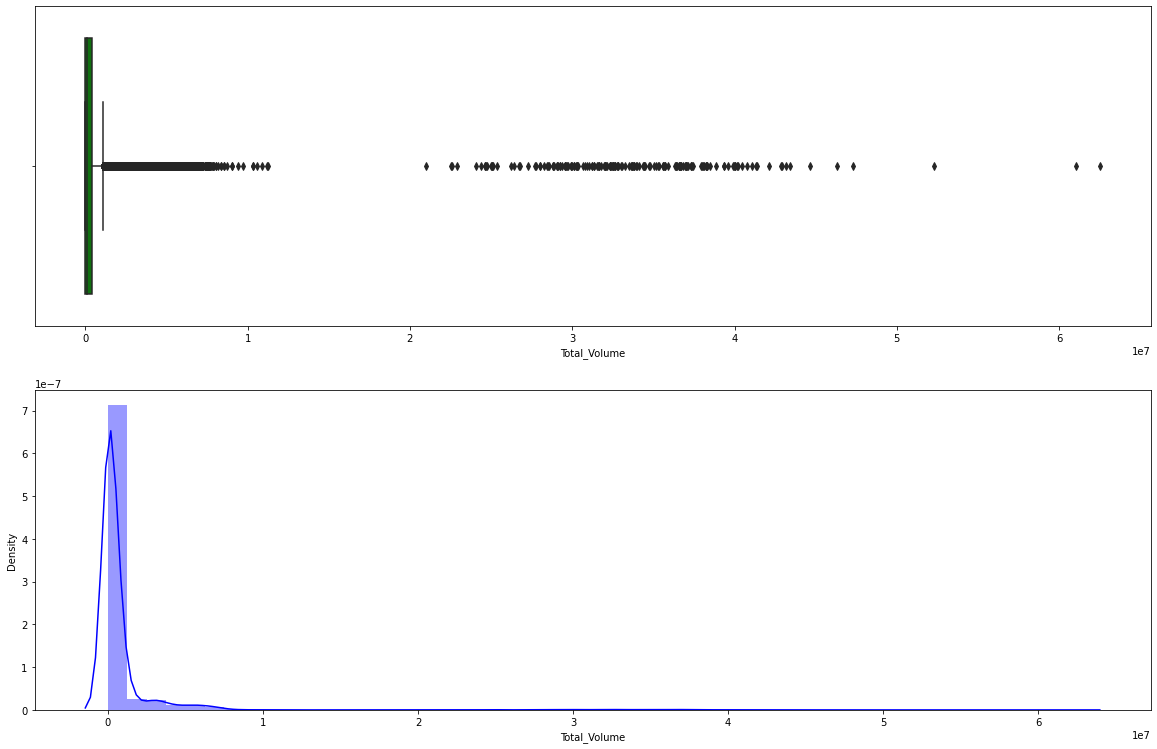

In [12]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['Total_Volume'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['Total_Volume'],color='blue')

The total volume feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='A4046', ylabel='Density'>

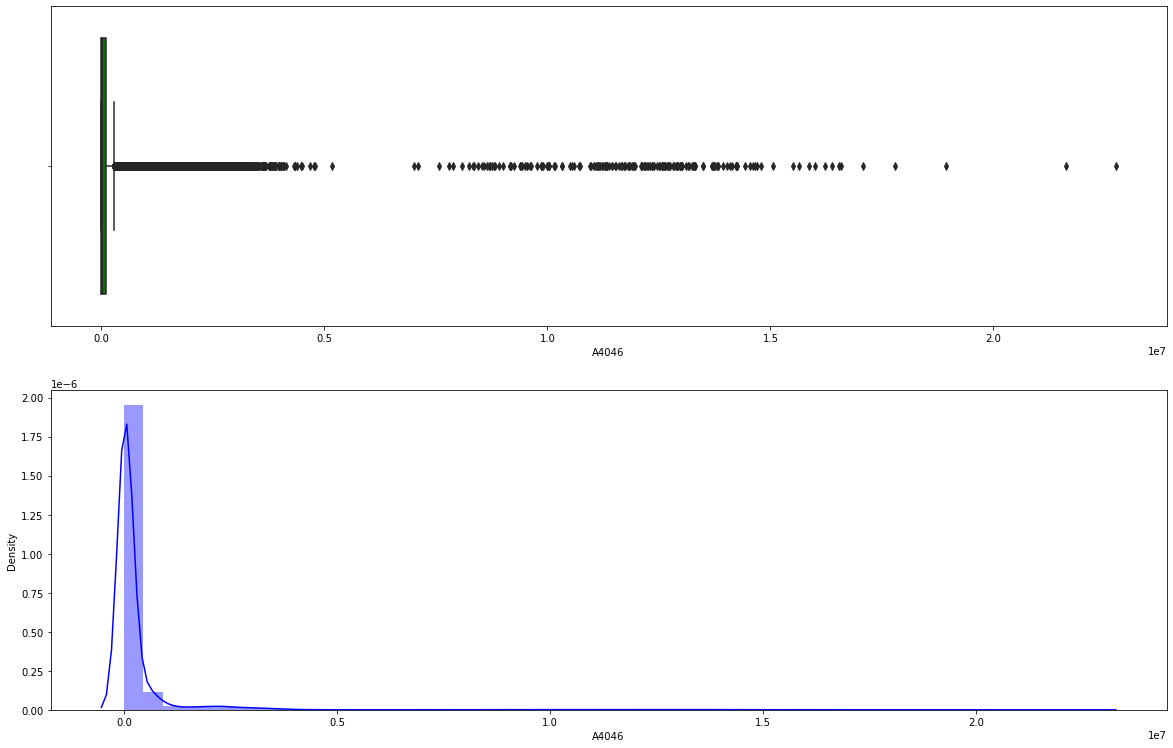

In [1045]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['A4046'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['A4046'],color='blue')

The 4046 feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='A4225', ylabel='Density'>

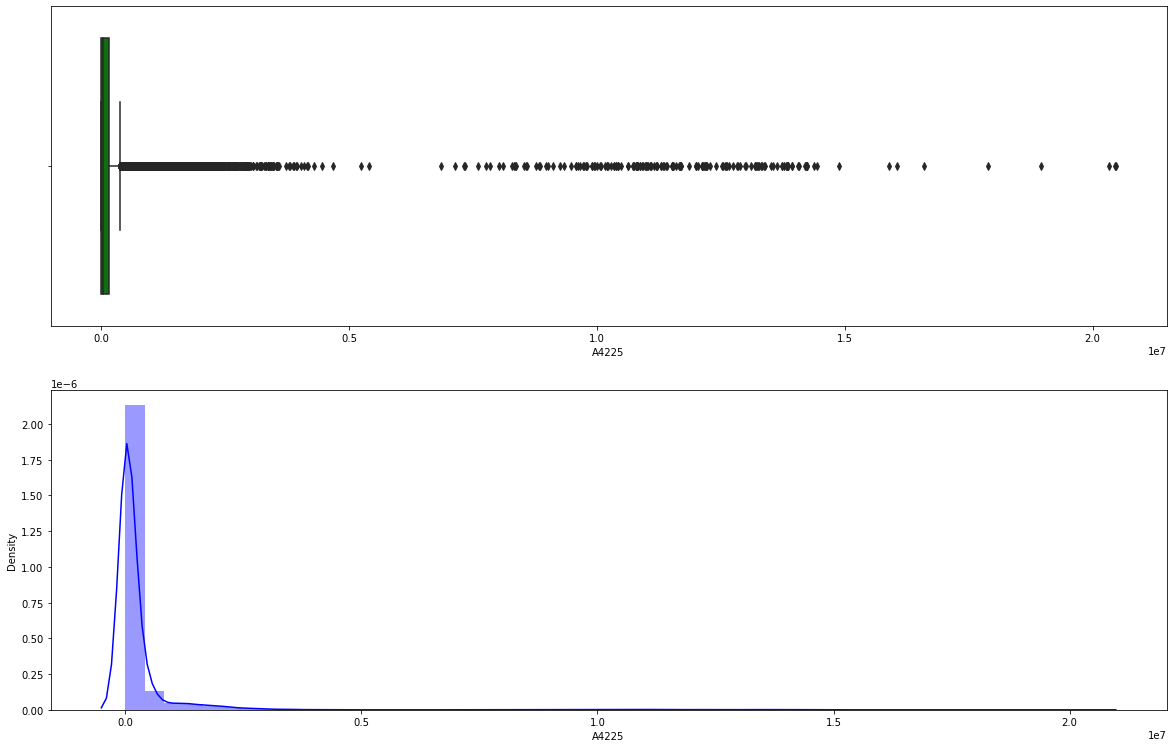

In [1046]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['A4225'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['A4225'],color='blue')

The 4225 feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='A4770', ylabel='Density'>

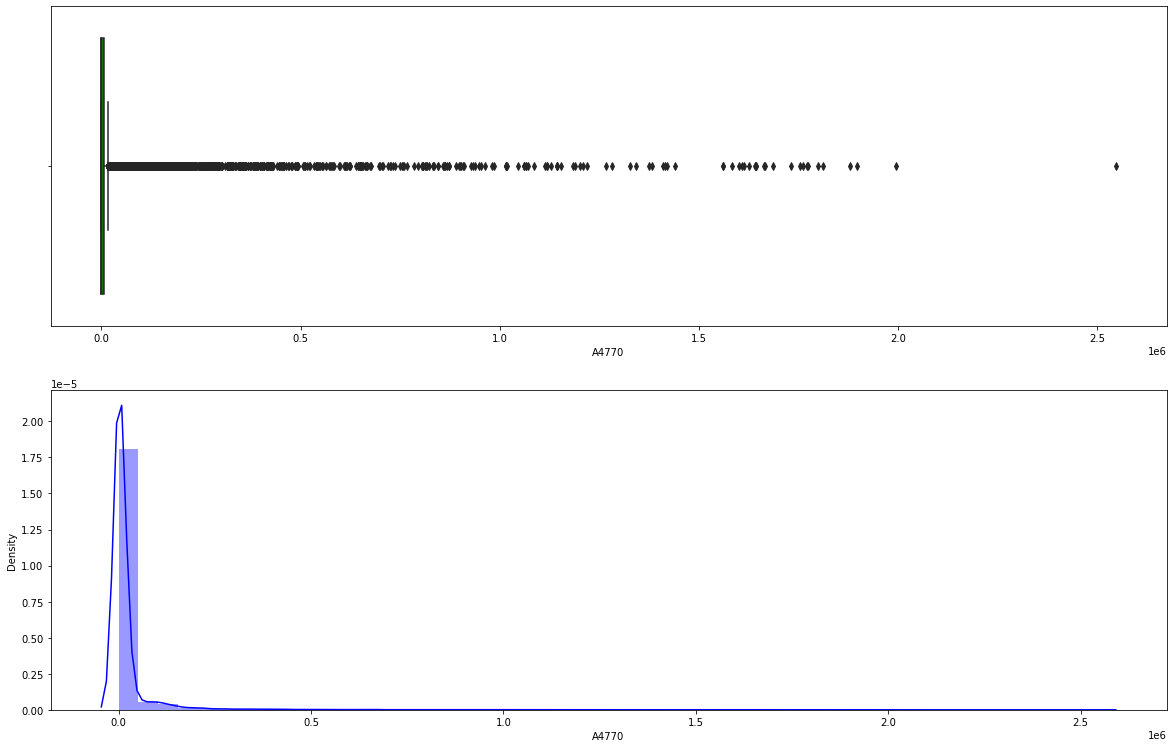

In [1047]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['A4770'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['A4770'],color='blue')

The 4046 feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='S_Bags', ylabel='Density'>

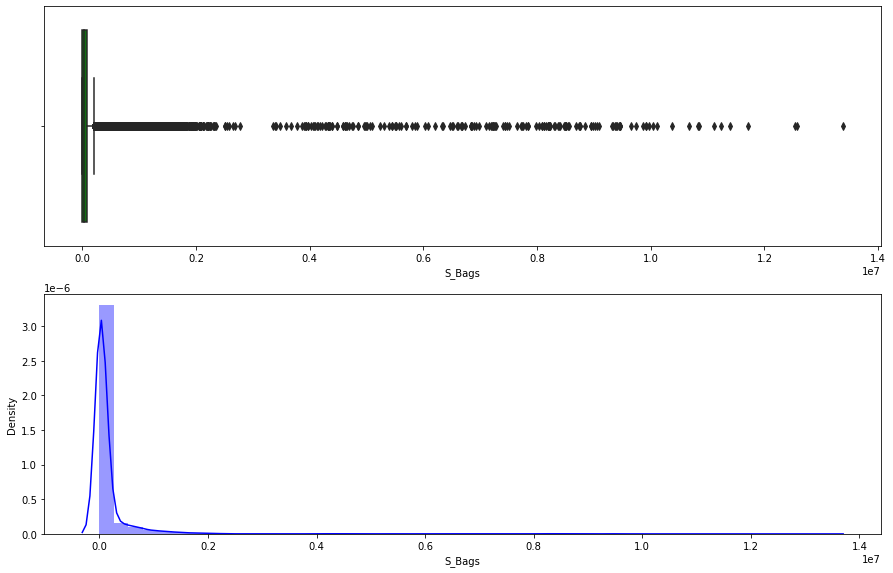

In [1048]:
plt.figure(figsize=(15,15))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['S_Bags'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['S_Bags'],color='blue')

The s_bags feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='L_Bags', ylabel='Density'>

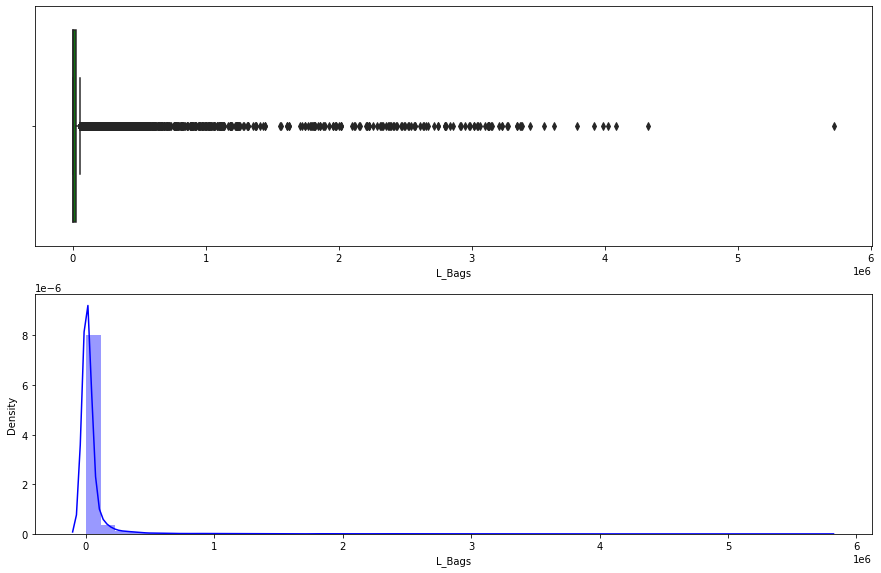

In [1049]:
plt.figure(figsize=(15,15))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['L_Bags'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['L_Bags'],color='blue')

The L_bags feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:xlabel='XL_Bags', ylabel='Density'>

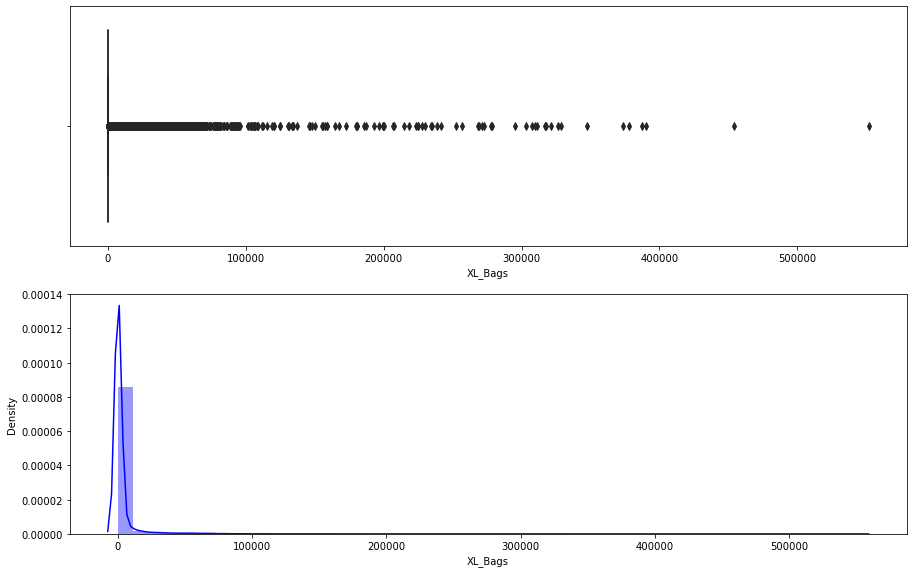

In [1050]:
plt.figure(figsize=(15,15))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['XL_Bags'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['XL_Bags'],color='blue')

The XL_bags feature has outliers.The data distribution of this feature is positively skewed

<AxesSubplot:ylabel='type'>

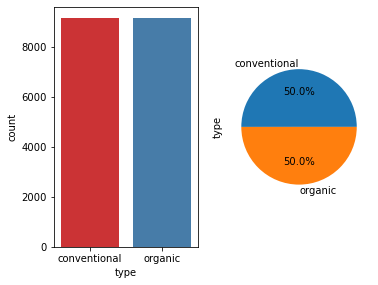

In [1051]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df_new.type,palette="Set1")

i += 1
plt.subplot(rows,cols,i)
df_new['type'].value_counts().plot.pie(autopct='%1.1f%%')

the type feature has 50% of conventional data and 50% of organic data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

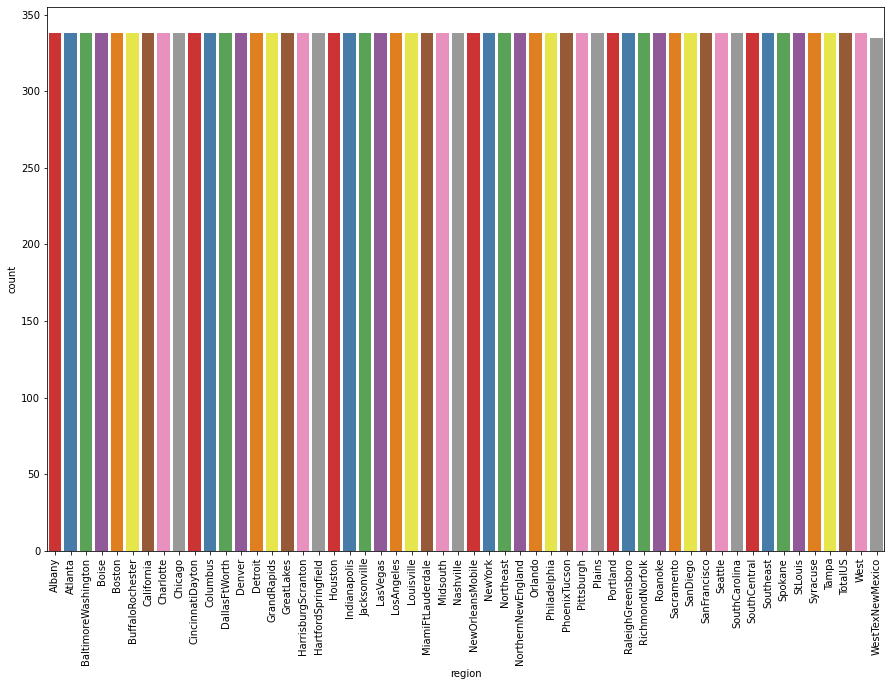

In [1052]:
plt.figure(figsize=(15,10))
rows=1
cols=1
i=0
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['region'].unique()) 
sns.countplot(df_new["region"],palette="Set1")
plt.xticks(rotation=90)



Except WestTexNewMexico all region has equal number of sales

<AxesSubplot:ylabel='year'>

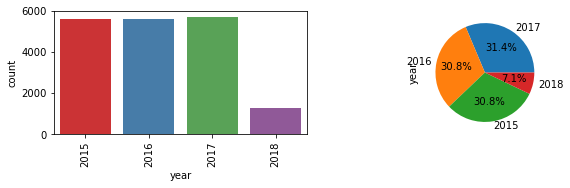

In [1053]:
plt.figure(figsize=(10,5))
rows=2
cols=2
i=0
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['year'].unique()) 
sns.countplot(df_new["year"],palette="Set1")
plt.xticks(rotation=90)
plt.grid=True

i += 1
plt.subplot(rows,cols,i)
df_new['year'].value_counts().plot.pie(autopct='%1.1f%%')

percentage of sales in the year 2015 and 2016 are same .the year 2018 has less sales compare to other years.the year 2017 has high sales

<AxesSubplot:title={'center':'Average price across different regions'}, xlabel='AveragePrice', ylabel='region'>

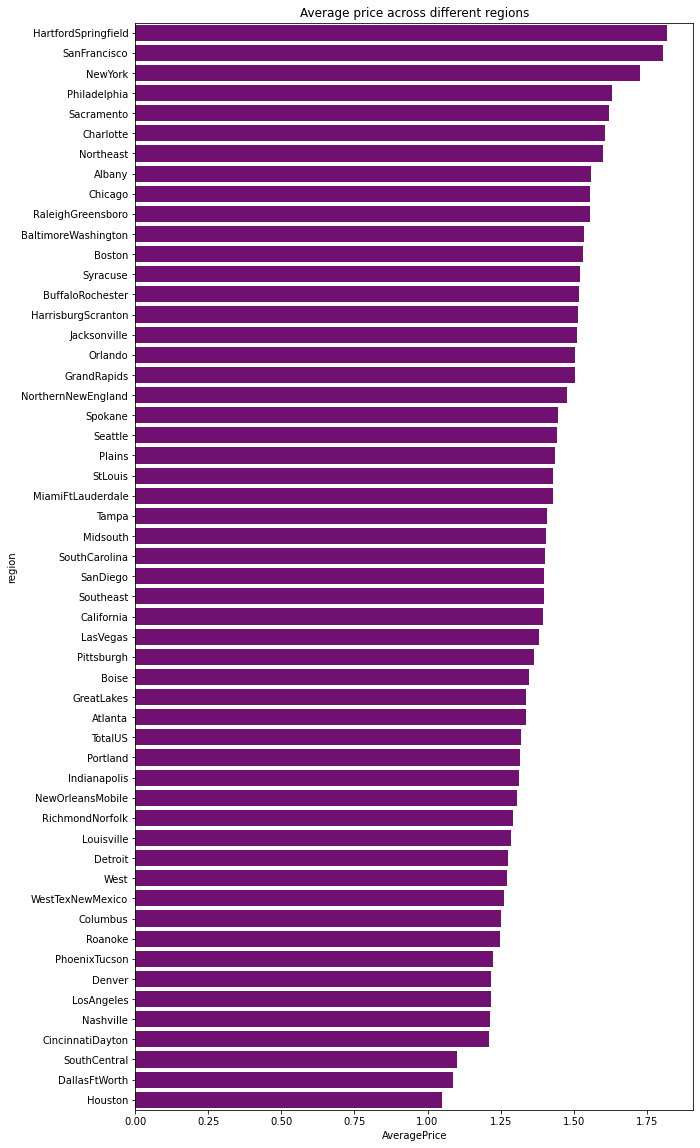

In [1054]:
region=df_new.groupby(['region']).mean()
region_df=pd.DataFrame(data=region)
order_reg=region_df.sort_values(by='AveragePrice',ascending=False,axis=0)
plt.figure(figsize=(10,20))
plt.title('Average price across different regions')
sns.barplot(x='AveragePrice',y=order_reg.index,data=order_reg,color="purple")


HartfordSpringfield region has highest price and houston has low average price

MULTIVARIATE ANALYSIS

<AxesSubplot:>

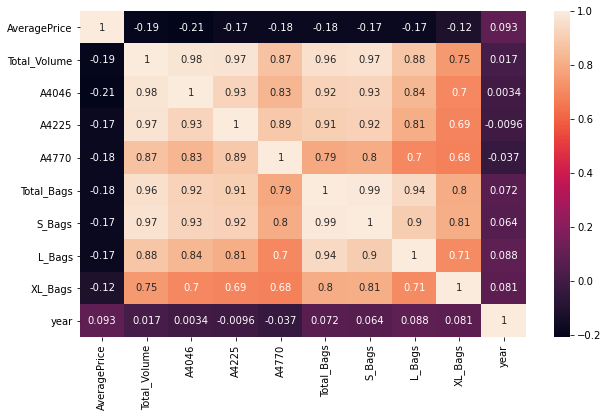

In [963]:
correlation=df_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

In [ ]:
A4046 fe feature is highly correlated with averageprice.all the features are negatively correlate with average price

Handling outliers

In [59]:
df_mod=df_new

In [60]:
col = ['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in col:
    z = np.abs(zscore(df_new[i]))
print(np.where(z > 3))

(array([ 780,  781,  791,  799, 2340, 2341, 2652, 2653, 2655, 2659, 2663,
       2666, 2667, 2671, 3610, 3611, 3612, 3613, 3614, 3615, 3617, 3620,
       3621, 3624, 3630, 3634, 3636, 3639, 4131, 4132, 4133, 4339, 4340,
       4341, 5173, 5174, 5176, 5177, 5194, 5195, 5196, 5222, 5223, 5224,
       5225, 5227, 5228, 5229, 5460, 5461, 5462, 5463, 5468, 5469, 5470,
       5471, 5472, 5473, 5474, 5476, 5477, 5478, 5479, 5480, 5481, 5482,
       5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493,
       5494, 5495, 5496, 5497, 5498, 5499, 5500, 5502, 5503, 5505, 5506,
       5507, 5508, 5509, 5511, 5934, 5935, 5936, 5937, 5939, 5940, 5941,
       5955, 5957, 5959, 5960, 5961, 5962, 5963, 5965, 5966, 5967, 5968,
       5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 6430, 6431, 6432,
       6434, 6435, 6436, 6437, 6439, 6445, 6448, 6455, 6816, 6817, 6818,
       6819, 7178, 8072, 8074, 8075, 8077, 8078, 8079, 8080, 8081, 8082,
       8083, 8319, 8320, 8321, 8322, 8323, 8324, 8

In [61]:
df_mod = df_new[(z<3)]

In [62]:
df_mod.shape

(18015, 13)

In [63]:
round((((18249-18015)/18249)*100),2)

1.28

after removing outliers using zscore the data loss is 1.28%

In [64]:
df_mod.head(5)

,Date,AveragePrice,Total_Volume,A4046,A4225,A4770,Total_Bags,S_Bags,L_Bags,XL_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


IQR Technique

In [65]:
Q1=df_new.quantile(0.25)
Q3=df_new.quantile(0.75)
IQR=Q3-Q1
data_clean1=df_new[~((df_new<(Q1-1.5*IQR))| (df_new>(Q1+1.5*IQR))).any(axis=1)]

In [20]:
data_clean1.shape

(8881, 13)

huge data loss so I'm not using IQR

___Handling Skewness

In [66]:
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    print(cols[i],"=",df_mod[cols[i]].skew())

AveragePrice = 0.5677670765747412
Total_Volume = 11.10938791811914
A4046 = 11.180590783409828
A4225 = 11.700613162642632
A4770 = 11.079595758815728
Total_Bags = 8.13892584681044
S_Bags = 8.418200553236469
L_Bags = 8.157017110271338
XL_Bags = 5.71266877721623


In [ ]:
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
ncol=5
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,9):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=cols[i],data=df_mod,palette="spring")
plt.show()

In [67]:
data_clean=df_mod

In [68]:

cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    print(cols[i],"=",data_clean[cols[i]].skew())

AveragePrice = 0.5677670765747412
Total_Volume = 11.10938791811914
A4046 = 11.180590783409828
A4225 = 11.700613162642632
A4770 = 11.079595758815728
Total_Bags = 8.13892584681044
S_Bags = 8.418200553236469
L_Bags = 8.157017110271338
XL_Bags = 5.71266877721623


In [69]:

cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    data_clean[cols[i]]=np.cbrt(data_clean[cols[i]])
    data_clean[cols[i]]=np.cbrt(data_clean[cols[i]])

In [70]:
data_clean=df_mod
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    print(cols[i],"=",data_clean[cols[i]].skew())

AveragePrice = -0.11301367867399699
Total_Volume = 0.4721202740987655
A4046 = 0.18926046681286
A4225 = 0.11785439821050733
A4770 = -0.058208304550016
Total_Bags = 0.2716319941330245
S_Bags = -0.1588920735173199
L_Bags = -0.5869481820794423
XL_Bags = 1.008520752107509


Skewness is removed

In [71]:
data_clean.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
A4046           0
A4225           0
A4770           0
Total_Bags      0
S_Bags          0
L_Bags          0
XL_Bags         0
type            0
year            0
region          0
dtype: int64

FEATURE ENGINEERING

Encoding all categorical coloumn into numerical column using label encoding technique

In [72]:
data_new=data_clean
col_encod=['Date','type','year','region']

In [73]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_new[col]= label.fit_transform(df_mod[col])

In [74]:
data_new.head(5)

,Date,AveragePrice,Total_Volume,A4046,A4225,A4770,Total_Bags,S_Bags,L_Bags,XL_Bags,type,year,region
0,51,1.032194,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0,0,0
1,50,1.033907,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0,0,0
2,49,0.991969,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0,0,0
3,48,1.008588,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0,0,0
4,47,1.027809,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0,0,0


In [75]:
x1=data_new.drop('AveragePrice',axis=1)
y1=data_new['AveragePrice']


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

__feature scaling transforming un scaled data into scaled data using min max scalining technique

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [78]:
x=scaled
y=y1

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [80]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.0092527405133622
Mean squared error 0.00016898070955252063
Root Mean squared error 0.012999258038538993
R2 Score 0.8441090636850966
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.02643905372094536
Mean squared error 0.0010493707252081004
Root Mean squared error 0.03239399211594799
R2 Score 0.031916806792105734
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.009808566559559175
Mean squared error 0.0002178946628844019
Root Mean squared error 0.014761255464370295
R2 Score 0.7989841378639013
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.01715147766856406
Mean squared error 0.0004775122198566198
Root Mean squared error 0.021852052989516108
R2 Score 0.5594773672

Cross Validation

In [81]:
scorel=[]

In [82]:
from sklearn.utils import shuffle
x=scaled
y=y1
x, y = shuffle(x, y, random_state = 7)

suffling data to avoid overfitting

In [83]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.84976852, 0.86397464, 0.86381051, 0.857298  , 0.86235577])

In [84]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.03502975, 0.04929363, 0.09635043, 0.04481365, 0.04018464])

In [85]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.80849734, 0.81373719, 0.81292299, 0.80235085, 0.80151117])

In [86]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.55781274, 0.58184633, 0.56928075, 0.55013112, 0.56432022])

In [87]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-4.44103609e-05, -1.00276187e-03, -4.70550491e-04, -7.67704343e-05,
       -5.54887176e-05])

In [88]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.91216918, 0.91310146, 0.91456488, 0.91187339, 0.91015817])

In [89]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.77406575, 0.78805993, 0.78266708, 0.78104054, 0.78583162])

Difference of predicted model and crossvalidation score

In [91]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [0.00565945 0.01986558 0.01970145 0.01318894 0.0182467 ]
SVR() difference is [0.00311294 0.01737682 0.06443363 0.01289685 0.00826783]
DecisionTreeRegressor() difference is [0.00951321 0.01475305 0.01393885 0.00336671 0.00252703]
LinearRegression() difference is [-0.00166463  0.02236896  0.00980338 -0.00934625  0.00484285]
Lasso() difference is [ 0.00026971 -0.00068864 -0.00015643  0.00023735  0.00025863]
RandomForestRegressor() difference is [0.00318779 0.00412007 0.00558349 0.002892   0.00117678]
GradientBoostingRegressor() difference is [-0.00413254  0.00986164  0.00446879  0.00284225  0.00763333]


RandomForestRegressor() difference is 0.00117678

Randomforest regressor has least difference

__Hyper tuning

In [96]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_features': ['auto', 'sqrt','log2'],
    'n_estimators': [10, 100, 200, 500],
    'bootstrap':[True],'criterion':['mse','mae']
}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")



In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters best_params{'n_estimators':500','max_features:'log2','bootstrap':True,'criterion':'mse'}

In [ ]:
MODELING USING BEST PARAMETERS

In [98]:
x=scaled
y=y1

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=RandomForestRegressor(n_estimators=500,max_features='log2',bootstrap=True,criterion='mse')
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 91.0
Mean absolute error 0.007308596715276069
Mean squared error 0.00010112609464671488
Root Mean squared error 0.010056147107451983
r2 score 91.0


After hyper tuning
Accuracy 91.0
Mean absolute error 0.007308596715276069
Mean squared error 0.00010112609464671488
Root Mean squared error 0.010056147107451983
__r2 score 91%

In [113]:
from joblib import dump
dump(model, 'model_avocado.joblib')

['model_avocado.joblib']

In [114]:
from joblib import load
loaded = load('model_avocado.joblib')